In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from tensorflow.keras.applications import VGG19
vgg_model = VGG19()

In [5]:
vgg_input = vgg_model.input
vgg_layers = vgg_model.layers
vgg_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
from tensorflow.keras.models import Model

In [7]:
# Build a model that returns the layer outputs

layer_outputs = [layer.output for layer in vgg_layers]
features = Model(inputs = vgg_input, outputs = layer_outputs)

In [8]:
layer_outputs

[<tf.Tensor 'input_1:0' shape=(None, 224, 224, 3) dtype=float32>,
 <tf.Tensor 'block1_conv1/Relu:0' shape=(None, 224, 224, 64) dtype=float32>,
 <tf.Tensor 'block1_conv2/Relu:0' shape=(None, 224, 224, 64) dtype=float32>,
 <tf.Tensor 'block1_pool/MaxPool:0' shape=(None, 112, 112, 64) dtype=float32>,
 <tf.Tensor 'block2_conv1/Relu:0' shape=(None, 112, 112, 128) dtype=float32>,
 <tf.Tensor 'block2_conv2/Relu:0' shape=(None, 112, 112, 128) dtype=float32>,
 <tf.Tensor 'block2_pool/MaxPool:0' shape=(None, 56, 56, 128) dtype=float32>,
 <tf.Tensor 'block3_conv1/Relu:0' shape=(None, 56, 56, 256) dtype=float32>,
 <tf.Tensor 'block3_conv2/Relu:0' shape=(None, 56, 56, 256) dtype=float32>,
 <tf.Tensor 'block3_conv3/Relu:0' shape=(None, 56, 56, 256) dtype=float32>,
 <tf.Tensor 'block3_conv4/Relu:0' shape=(None, 56, 56, 256) dtype=float32>,
 <tf.Tensor 'block3_pool/MaxPool:0' shape=(None, 28, 28, 256) dtype=float32>,
 <tf.Tensor 'block4_conv1/Relu:0' shape=(None, 28, 28, 512) dtype=float32>,
 <tf.Tens

In [9]:
img = np.random.random((1,224,224,3)).astype("float32")
extracted_features = features(img)

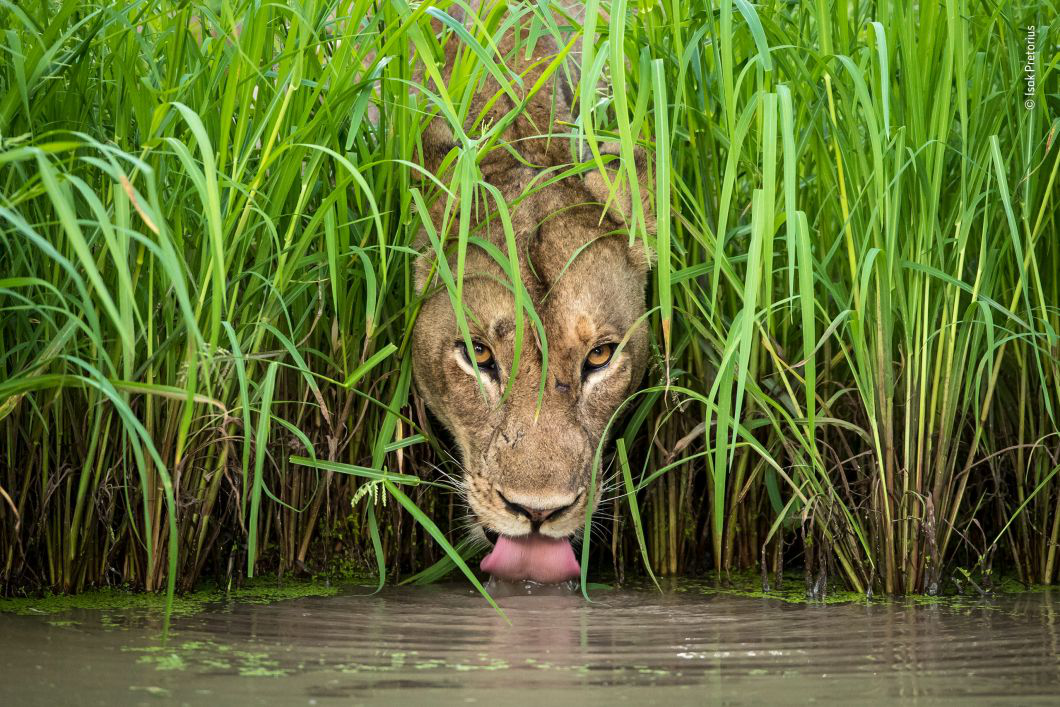

In [12]:
import IPython.display as display
from PIL import Image
display.display(Image.open('../cool_cat.jpg'))

In [14]:
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image

img_path = '../cool_cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

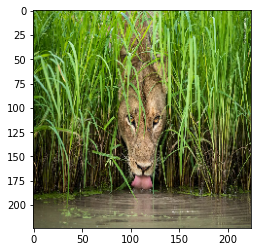

In [18]:
plt.imshow(img)

In [19]:
extracted_features=features(x)


 f1.shape:  (1, 224, 224, 3)


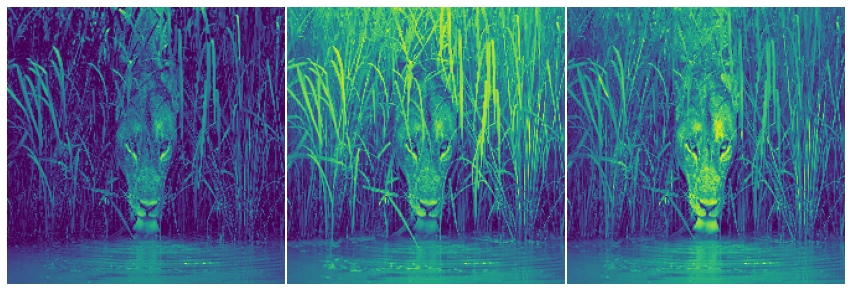

In [20]:
f1 = extracted_features[0]
print("\n f1.shape: ", f1.shape)

imgs = f1[0,:,:]
plt.figure(figsize=(15,15))
for n in range(3):
    ax = plt.subplot(1,3, n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis("off")
plt.subplots_adjust(wspace=0.01, hspace=0.01)